In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytcspc as pc

%matplotlib inline
%config InlineBackend.figure_format='retina'

c:\Users\Arunachalam\anaconda3\envs\pytcspc-dev4\Lib\site-packages\pytcspc\sdt.py:34: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# load FLIM data

In [3]:
flimg  = pc.load_sdt("sample_data/p7_z2.sdt", use_dask=False).isel(file_info=0).sel(channel="M1")
cat_probs = np.load("sample_data/p7_z2_Probabilities.npy")
use_px = cat_probs[:,:,0] > 0.7
dc = pc.decay_curve(flimg, mask=use_px)

# calculate lifetime images using blurring kernels of different sizes

shape (512, 512)


c:\Users\Arunachalam\anaconda3\envs\pytcspc-dev4\Lib\site-packages\pytcspc\sdt.py:217: RuntimeWarning: invalid value encountered in divide
  mean_lifetime_image_blur = np.divide(sum_lifetime_blur, intensity_blur)


shape (512, 512)


c:\Users\Arunachalam\anaconda3\envs\pytcspc-dev4\Lib\site-packages\pytcspc\sdt.py:217: RuntimeWarning: invalid value encountered in divide
  mean_lifetime_image_blur = np.divide(sum_lifetime_blur, intensity_blur)


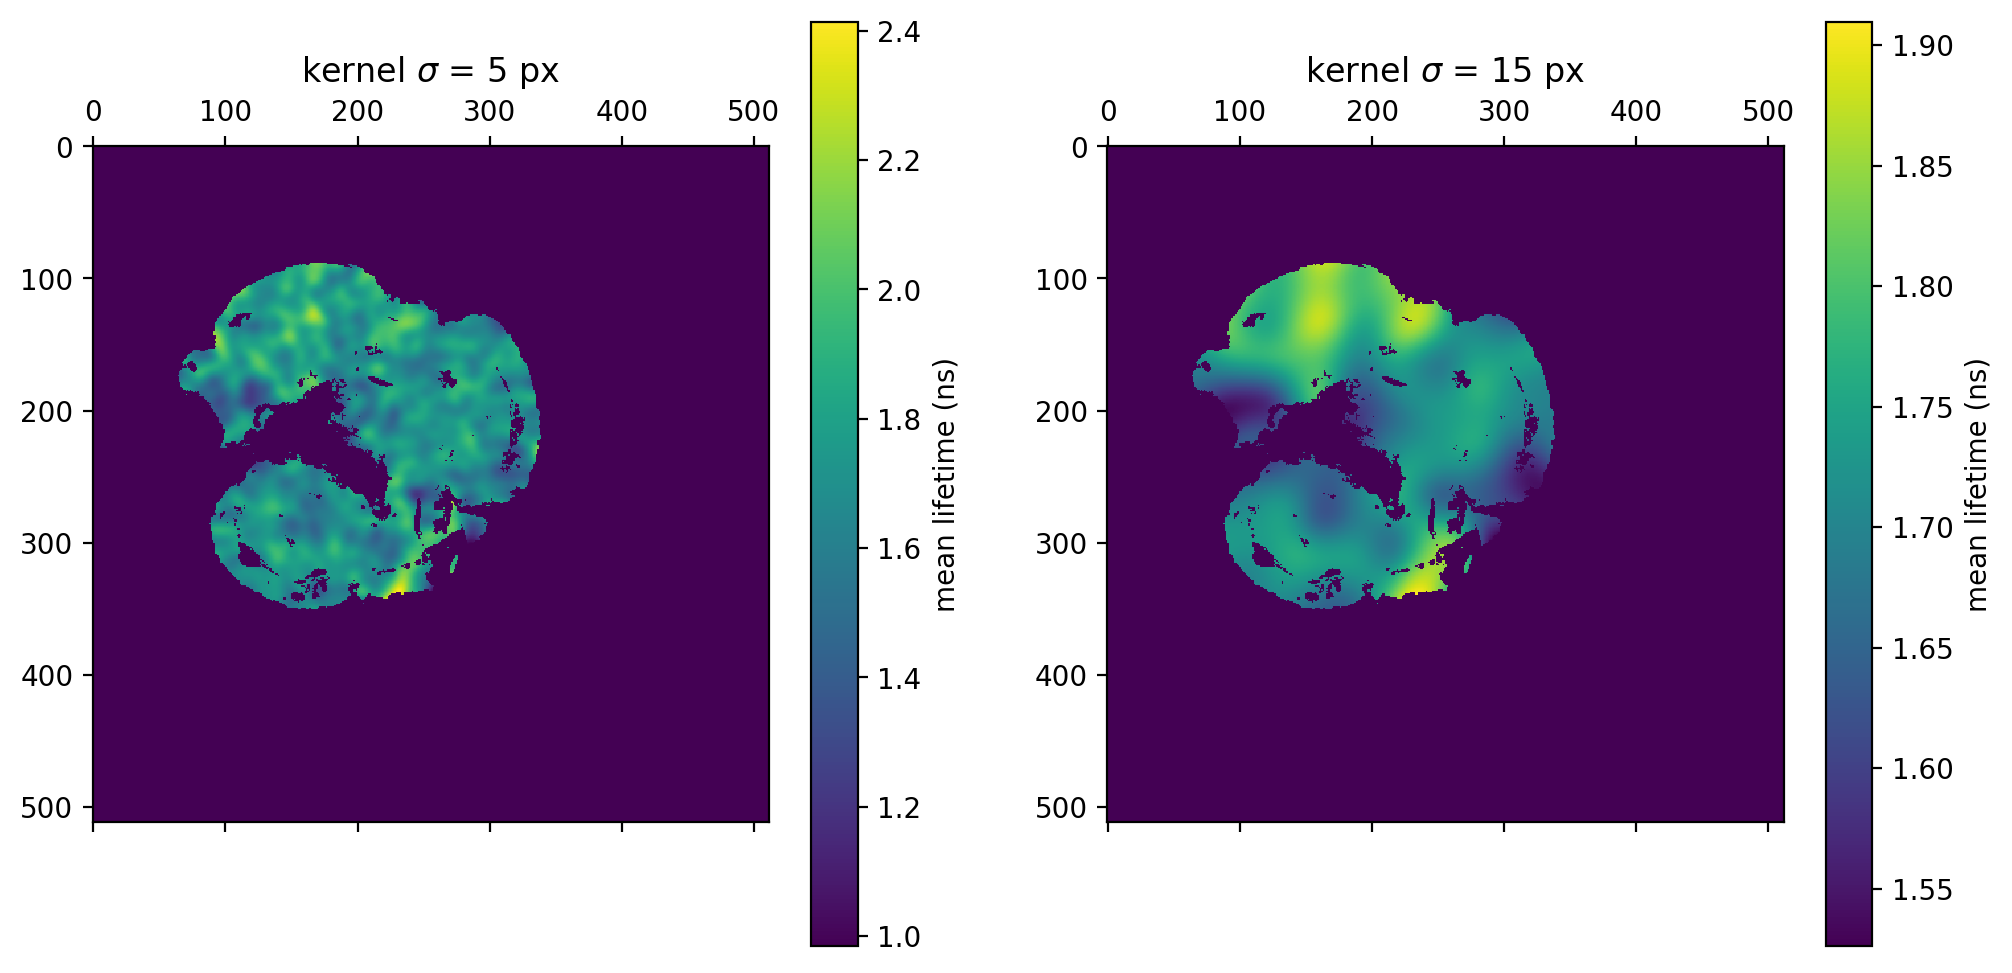

In [34]:
fig, ax = plt.subplots(figsize=(12,6), ncols=2)

lifetime_img = pc.mean_lifetime_image(flimg, use_px, subtract_constant_lifetime=flimg.microtime_ns.data[np.argmax(dc)], sigma=5)
nz = lifetime_img[lifetime_img != 0]
p1 = ax[0].matshow(lifetime_img, vmin=np.min(nz), vmax=np.max(nz))
ax[0].set_title(r"kernel $\sigma$ = 5 px")
plt.colorbar(p1, label="mean lifetime (ns)")

lifetime_img = pc.mean_lifetime_image(flimg, use_px, subtract_constant_lifetime=flimg.microtime_ns.data[np.argmax(dc)], sigma=15)
nz = lifetime_img[lifetime_img != 0]
p2 = ax[1].matshow(lifetime_img, vmin=np.min(nz), vmax=np.max(nz))
ax[1].set_title(r"kernel $\sigma$ = 15 px")
plt.colorbar(p2, label="mean lifetime (ns)")